<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Kullback-Leibler divergence



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# What is the Kullback-Leibler divergence?
<hr style="border:2px solid black"> </hr>


- **Kullback-Leibler Divergence (a.k.a KL divergence)** allows you to compare two probability distributions.
- Very often in machine learning, we'll replace observed data or a complex distributions with a simpler, approximating distribution. KL Divergence helps us to measure just how much information we lose when we choose an approximation, thus we can even use it as our objective function to pick which approximation would work best for the problem at hand.

 - The example is borrowed from [here](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)).
- Suppose we're a group of scientists visiting space and we discovered some space worms. These space worms have varying number of teeth. After a decent amount of collecting, we have come to this empirical probability distribution of the number of teeth in each worm:



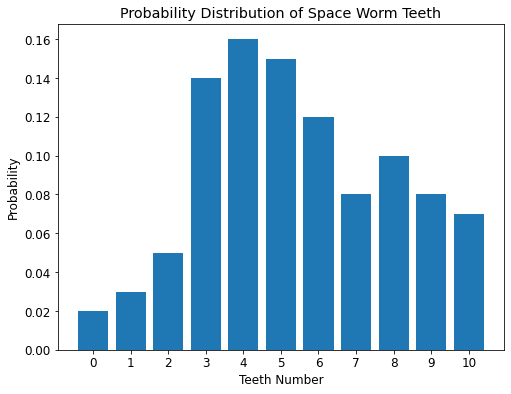

In [2]:
# ensure the probability adds up to 1
true_data = np.array([0.02, 0.03, 0.05, 0.14, 0.16, 0.15, 0.12, 0.08, 0.1, 0.08, 0.07])
n = true_data.shape[0]
index = np.arange(n)
assert sum(true_data) == 1.0

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

plt.bar(index, true_data)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(index)
plt.show()


- Now we need to send this information back to earth. But the problem is that sending information from space to earth is **expensive**. So we wish to represent this information with a minimum amount of information which can be done using a **parametrised** distribution:
    - Uniform distribution
    - Binomial distribution



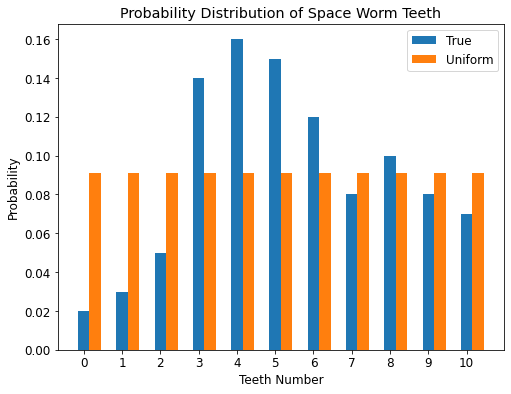

In [3]:
uniform_data = np.full(n, 1.0 / n)
width = 0.3
plt.bar(index, true_data, width=width, label='True')
plt.bar(index + width, uniform_data, width=width, label='Uniform')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()

In [4]:
# we estimate the parameter of the binomial distribution
p = true_data.dot(index) / n
print('p for binomial distribution:', p)
binom_data = binom.pmf(index, n, p)
binom_data

p for binomial distribution: 0.49454545454545457


array([0.00055018, 0.00592134, 0.0289677 , 0.08502751, 0.16638476,
       0.22791121, 0.22299226, 0.15584249, 0.07623949, 0.02486468,
       0.00486561])

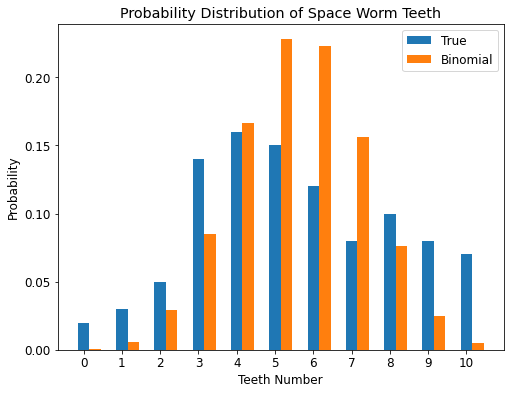

In [5]:
width = 0.3
plt.bar(index, true_data, width=width, label='True')
plt.bar(index + width, binom_data, width=width, label='Binomial')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(np.arange(n))
plt.legend()
plt.show()


- Comparing each of our models with our original data we can see that neither one is the perfect match.
- **Which one is better?** The KL divergence will help us to asnwer this question.



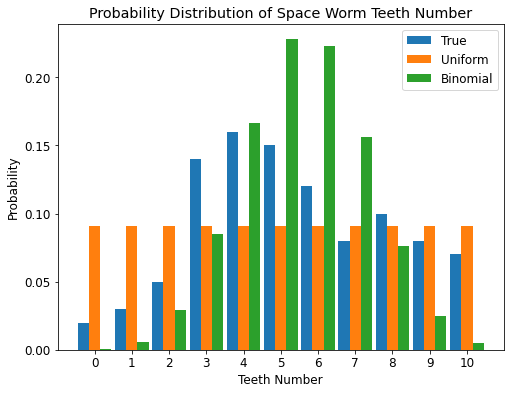

In [6]:
plt.bar(index - width, true_data, width=width, label='True')
plt.bar(index, uniform_data, width=width, label='Uniform')
plt.bar(index + width, binom_data, width=width, label='Binomial')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth Number')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend()
plt.show()



*Kullback-Leibler (KL) Divergence** offers a quantitative way to measure which one does the job better.

KL Divergence has its origins in information theory. The primary goal of information theory is to quantify how much information is in our data. To recap, one of the most important metric in information theory is called Entropy, which we will denote as $H$. The entropy for a probability distribution is defined as:

\begin{align}
H = -\sum_{i=1}^N p(x_i) \cdot \log p(x_i)
\end{align}

If we use $log_2$ for our calculation we can interpret entropy as, using a distribution $p$, the minimum number of bits it would take us to encode events drawn from distribution $p$. Knowing we have a way to quantify how much information is in our data, we now extend it to quantify how much information is lost when we substitute our observed distribution for a parameterized approximation.

The formula for Kullback-Leibler Divergence is a slight modification of entropy. Rather than just having our probability distribution $p$ we add in our approximating distribution $q$, then we look at the difference of the log values for each:

\begin{align}
D_{KL}(p || q) = \sum_{i=1}^{N} p(x_i)\cdot (\log p(x_i) - \log q(x_i))
\end{align}

Essentially, what we're looking at with KL divergence is the expectation of the log difference between the probability of data in the original distribution with the approximating distribution. Because we're multiplying the difference between the two distribution with $p(x_i)$, this means that matching areas where the original distribution has a higher probability is more important than areas that has a lower probability. Again, if we think in terms of $\log_2$, we can interpret this as, how many extra bits of information we need to encode events drawn from true distribution $p$, if using an optimal code from distribution $q$ rather than $p$.

The more common way to see KL divergence written is as follows:

\begin{align}
D_{KL}(p || q) = \sum_{i=1}^N p(x_i) \cdot \log \frac{p(x_i)}{q(x_i)}
\end{align}

since $\text{log}a - \text{log}b = \text{log}\frac{a}{b}$.

If two distributions, $p$ and $q$ perfectly match, $D_{KL}(p || q) = 0$, otherwise the lower the KL divergence value, the better we have matched the true distribution with our approximation.  



In [7]:
def compute_kl_divergence_V1(p_probs, q_probs):
    """"Compute KL with loops.
    KL (p || q)
    """
    kl_div = 0.0
    for p, q in zip(p_probs, q_probs):
        kl_div += p * np.log(p / q)

    return kl_div


def compute_kl_divergence_V2(p_probs, q_probs):
    """"Compute KL with no loops.

    Totally equivalent with _V1
    KL (p || q)
    """
    kl_div = p_probs * np.log(p_probs / q_probs)
    return np.sum(kl_div)

In [8]:
print('KL(True||Uniform): ', compute_kl_divergence_V1(true_data, uniform_data))
print('KL(True||Binomial): ', compute_kl_divergence_V1(true_data, binom_data))

print('KL(True||Uniform): ', compute_kl_divergence_V2(true_data, uniform_data))
print('KL(True||Binomial): ', compute_kl_divergence_V2(true_data, binom_data))

KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.3281943531140208
KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.32819435311402084


# Conclusions
<hr style="border:2px solid black"> </hr>


- KL-divergence allows you to calculate which our approximate distribution more closely reflects our true distribution. 

- As we can see the information lost by using the Binomial approximation is greater than using the uniform approximation. We're **better off** sticking with the Uniform approximation.

- **Is KL-divergence as a way of measuring distance?**, No, because is is **asymmetric**: $D_{KL}(p || q) \neq D_{KL}(q || p)$.



# References
<hr style="border:2px solid black"> </hr>


- [This code notebook](https://github.com/ethen8181/machine-learning/blob/master/model_selection/kl_divergence.ipynb<br>)
- [Blog: Kullback-Leibler Divergence Explained](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)
- [Youtube: A Short Introduction to Entropy, Cross-Entropy and KL-Divergence](https://www.youtube.com/watch?v=ErfnhcEV1O8)
- [StackExchange: Why do we use Kullback-Leibler divergence rather than cross entropy in the t-SNE objective function?](https://stats.stackexchange.com/questions/265966/why-do-we-use-kullback-leibler-divergence-rather-than-cross-entropy-in-the-t-sne/265989)
- [Youtube: A Short Introduction to Entropy, Cross-Entropy and KL-Divergence](https://www.youtube.com/watch?v=ErfnhcEV1O8)
- [StackExchange: Why do we use Kullback-Leibler divergence rather than cross entropy in the t-SNE objective function?](https://stats.stackexchange.com/questions/265966/why-do-we-use-kullback-leibler-divergence-rather-than-cross-entropy-in-the-t-sne/265989)

